In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#all the libraries
import matplotlib.pyplot as plt 
import plotly.express as px

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head(5)

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [5]:
train_df.shape

(70128, 6)

In [6]:
train_df.isna().any()

row_id      False
date        False
country     False
store       False
product     False
num_sold    False
dtype: bool

In [7]:
train_df.nunique()

row_id      70128
date         1461
country         6
store           2
product         4
num_sold      699
dtype: int64

In [8]:
train_df['country'].value_counts()

Germany    11688
Italy      11688
Spain      11688
Poland     11688
Belgium    11688
France     11688
Name: country, dtype: int64

In [9]:
feature_df = train_df.groupby(['country','product','store']).sum()
feature_df.reset_index()
feature_df.count()

row_id      48
num_sold    48
dtype: int64

In [10]:
px.bar(train_df.groupby('country')['num_sold'].sum())

In [11]:
px.bar(train_df.groupby('store')['num_sold'].sum())

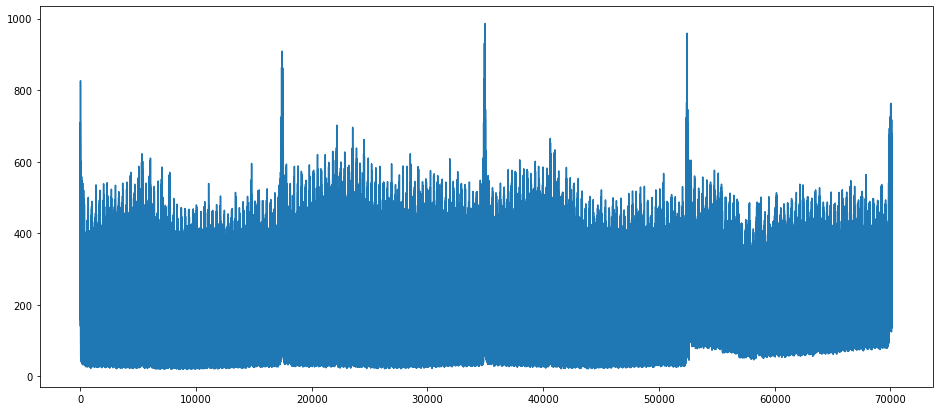

In [18]:
plt.figure(figsize=(16,7))
plt.plot(train_df['num_sold'])

In [28]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month_name()
train_df['day'] = train_df['date'].dt.day
train_df = train_df.drop('row_id',axis=1)

In [37]:
df = train_df.groupby(['year']).mean()
df

,num_sold,day
year,,
2017,177.634874,15.720548
2018,195.515068,15.720548
2019,184.525057,15.720548
2020,219.444046,15.756831


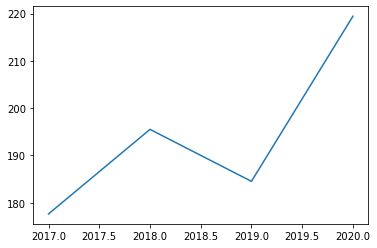

In [38]:
plt.plot(df['num_sold'])

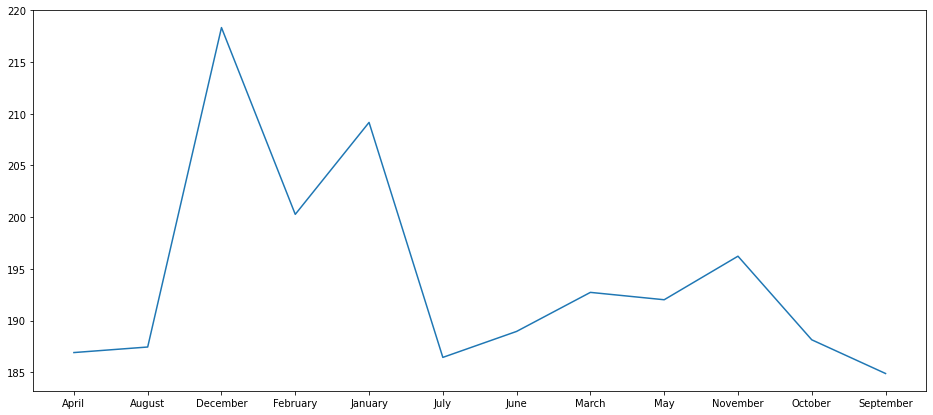

In [43]:
plt.figure(figsize=(16,7))
df1 = train_df.groupby(['month']).mean()
plt.plot(df1['num_sold'])
plt.show()